In [1]:
import numpy as np
import sympy
from sympy import S, Symbol, symbols, Function, dsolve, solveset, plot_implicit, integrate, diff, plot
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import exp as Exp
from sympy import log as Log
from sympy import pi as Pi
import matplotlib.pyplot as plt
from matplotlib.spines import Spines
%matplotlib inline

In [2]:
from typing import overload, Callable, Optional, Tuple, Any

from sympy import latex
from sympy.core._print_helpers import Printable
from IPython.display import Latex

# Should be set to 'False' if Google Colab is used.
VS_CODE: bool = True

@overload
def display_with_text(text: Optional[str] = None, *, sep: str = r"\\") -> None:
    ...

@overload
def display_with_text(text: Optional[str] = None, expression: Optional[Any] = None, *, sep: str = r"\\") -> None:
    ...

@overload
def display_with_text(text: Optional[str] = None, *expressions: Any, sep: str = r"\\") -> None:
    ...

def display_with_text(*args, **kwargs) -> None:
    text: Optional[str] = kwargs.get("text", None)
    expression: Optional[Any] = kwargs.get("expression", None)
    
    sep: str = kwargs.get("sep", r"\\")
    if not isinstance(sep, str):
        raise ValueError(f"Keyword argument 'sep' must be type of <class 'str'> (class str)")

    if text is None and args and args[0] is not None:
        text = str(args[0])
    
    if text is not None and not isinstance(text, str):
        text = str(text)
    
    expressions: Tuple[Any] = args[1:]
    if expression is not None:
        expressions += (expression,)

    if not expressions:
        if text is not None:
            text = "$ \\text{" + text + "} $" if VS_CODE else "\\text{" + text + '}'
            display(Latex(text))
        return
    
    expr_processor: Callable[[Any], str] = \
        lambda expr: str(latex(expr) if isinstance(expr, Printable) else expr)
    final_expression: str = sep.join(map(expr_processor, expressions))
    
    if VS_CODE:
        final_expression = "$ " + final_expression + " $"

    if text is not None:
        final_expression = \
            ("$ \\text{" + text + "} $ " if VS_CODE else "\\text{" + text + "} ") \
            + final_expression

    display(Latex(final_expression))


## Занятие 17
## Математический анализ
## Линейные ОДУ второго порядка с постоянными коэффициентами
## Задание № 1
Решить аналитически ОДУ с разделяющимися переменными
$$
y'=\ln(x+2)e^{2-y}.
$$
Найти общий интеграл. 

In [3]:
x, y = symbols("x y", real=True)
C = Symbol('C', positive=True)
ODE1 = sympy.Eq(integrate(y/Exp(2 - y), y), integrate(Log(x + 2), x) + C)
display_with_text("Решение ОДУ:", ODE1)

<IPython.core.display.Latex object>

## Задание № 2
Решить аналитически задачу Коши
$$
y^3y'=\frac{1}{1+x^2},\qquad y(0)=1.
$$
Найти общий интеграл, учесть начальное условие. 
Построить график $y$, пользуясь plot_implicit.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

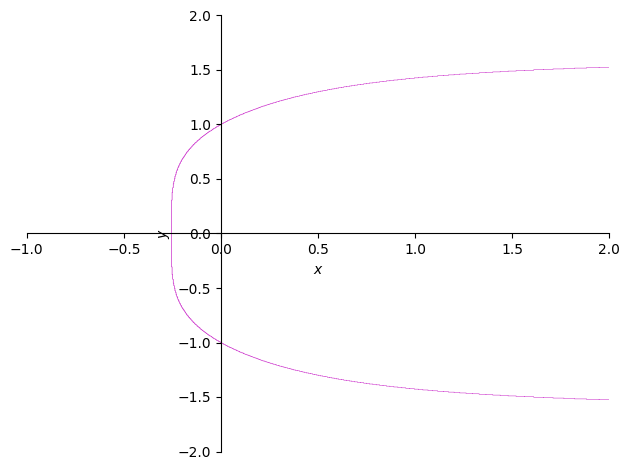

In [4]:
x, y, C = symbols("x y C", real=True)
ODE2 = sympy.Eq(integrate(y**3, y), integrate(1/(1 + x**2), x) + C)
display_with_text("Решение ОДУ:", ODE2)

C_values = solveset(ODE2.subs({x: 0, y: 1}), C)
display_with_text("Значения константы C:", C_values)

plot_implicit(ODE2.subs(C, *C_values), (x, -1, 2), (y, -2, 2), line_color='m')

## Индивидуальное задание
Решить задачу Коши аналитически, методом Эйлера и методом Рунге-Кутты. Построить в одной координатной плоскости графики точного и приближенных решений.

$ \frac{dy(x)}{dx} = 6x^7y(x) − 5x^7,  y(0) = −5 $

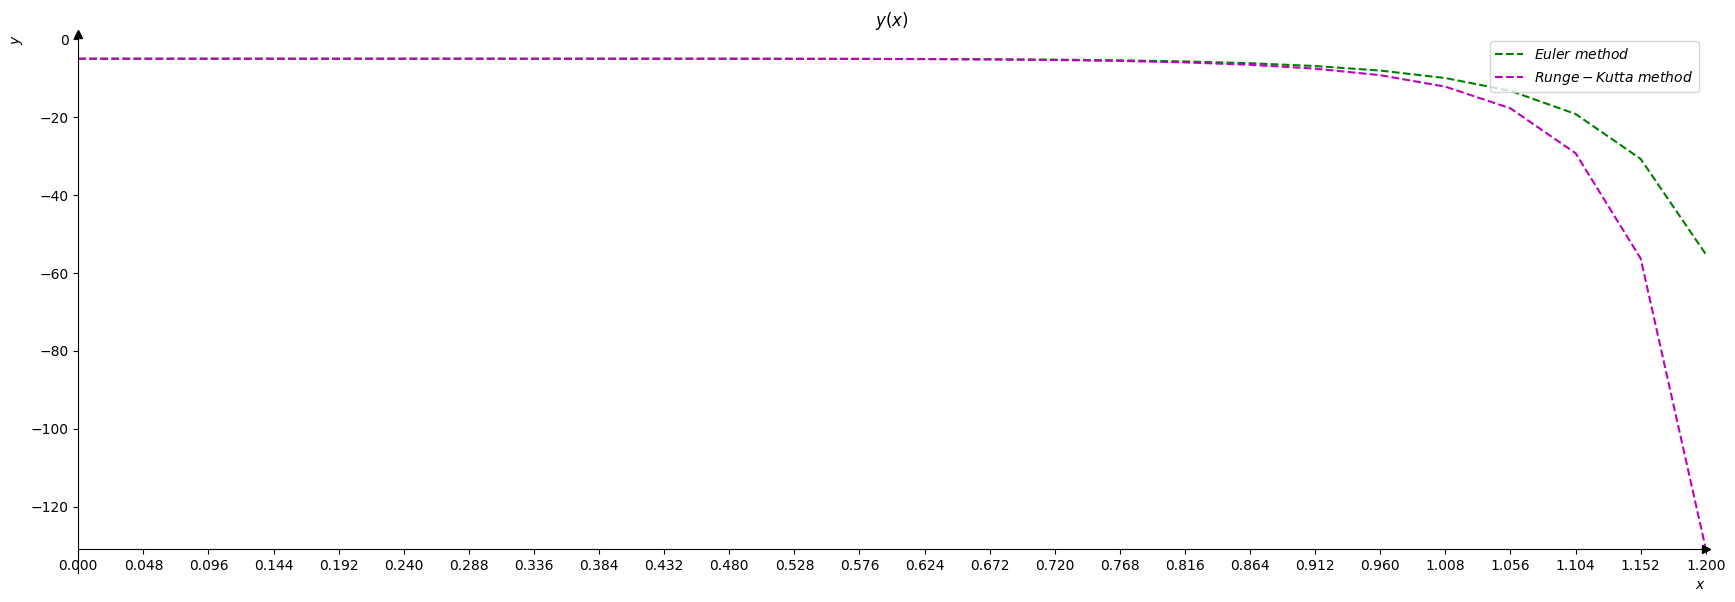

In [6]:
from numpy import float64

def config_ax(ax, xticks, min_y, xlim: Tuple = (0, 1)) -> None:
    ax.set_title("$y(x)$")
    ax.legend(loc="upper right")
    ax.set_xlim(xlim)
    spines: Spines = ax.spines
    spines.right.set_color("none")
    spines.top.set_color("none")
    spines.bottom.set_position(("data", min_y))
    spines.left.set_position(("data", 0))
    ax.set_ylabel("$y$", loc="top")
    ax.set_xlabel("$x$", loc="right")
    ax.plot(1, min_y, "k>", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
    ax.set_xticks(xticks)
    plt.rcParams['figure.figsize'] = [21, 7] if VS_CODE else [30, 12]

def f(x, y):
    return 6*x**7*y - 5*x**7

def Euler_method(y0: float64, h, x_arr):
    N: int = len(x_arr)
    y_arr = np.zeros(N)
    y_arr[0] = y0
    for k in range(N - 1):
        y_k = y_arr[k]
        y_arr[k + 1] = y_k + h*f(x_arr[k], y_k)

    return y_arr

def Runge_Kutta_method(y0: float64, h, x_arr):
    N: int = len(x_arr)
    y_arr = np.zeros(N)
    y_arr[0] = y0
    for k in range(N - 1):
        y_k = y_arr[k]
        x_k = x_arr[k]
        f_xk_yk = f(x_k, y_k)
        y_k_1_star = y_k + h*f_xk_yk
        x_k_1 = x_arr[k + 1]
        y_arr[k + 1] = y_k + h*(f_xk_yk + f(x_k_1, y_k_1_star))/2
    
    return y_arr

x, y = symbols("x y", real=True)

L = 1.2
N = 25
h = float64(L / N)
x0 = float64(0)
y0 = float64(-5)

w_h = np.linspace(x0, x0 + L, N + 1)
y_arr1 = Euler_method(y0, h, w_h)
y_arr2 = Runge_Kutta_method(y0, h, w_h)

ax = plt.gca()
ax.plot(w_h, y_arr1, "g--", label="$Euler$ $method$")
ax.plot(w_h, y_arr2, "m--", label="$Runge-Kutta$ $method$")
config_ax(ax, w_h, min(min(y_arr1), min(y_arr2)), (x0, L))